# Real Impact Of Inflation

Our project is to uncover the difference between the reported and actual urban inflation. We will be using the CPI data, from the Bureau of Labor Statistics, with and without food and energy costs to answer this question. Additionally, we will also be analyzing the differences in inflation between the various US regions, compared to the national average, over time.

## The Data
@TODO: Insert description of the BLS data

In [242]:
# Importing dependencies
import numpy as np
import pandas as pd
import plotly.express as px
import panel as pn
import seaborn as sns
import hvplot.pandas
import geoviews as gv
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from pathlib import Path
import datetime

%matplotlib inline

### Reading/Pre-Processing the Data

In [66]:
# List of non-regional csv titles
non_regional_csv_titles = ['All','Energy','Food','Gasoline', 'Less-Food-Energy']
# List of regional csv titles
regional_csv_titles = ['Midwest', 'Northeast', 'South', 'West']

In [67]:
class Df_Processor:
    # Constructor
    def __init__(self,titles,is_regional=False):
        # Save titles
        self.titles = titles
        # Save is_regional
        self.is_regional = is_regional
        
        # Set empty list for processed DataFrames
        self.processed_dataframes = []
        
        # Run dataframe processing method
        self.process_dfs()

    # Method to get dataframes
    def get_dfs(self):
        # Empty list to hold DataFrames
        dataframes = []
        
        # Looping over csv titles list
        for title in self.titles:
            # Columns to drop
            columns_to_drop = ['HALF1','HALF2']
            
            # If the regional set is 
            if self.is_regional:
                # Add the Annual column
                columns_to_drop.append('Annual')

            # Saving the csv (by title) as DataFrame, making Year the index column and dropping the HALF1 and HALF2 columns
            df = pd.read_csv(Path(f'./Data/{title}.csv')).drop(columns=columns_to_drop).melt(id_vars=['Year'], var_name='Month', value_name='Price')

            # Appending dataframe to dataframes list
            dataframes.append(df)
        
        # Returning all dataframes
        return dataframes

    # Method to data pre-process dataframes
    def process_dfs(self):
        # Dictionary of months and thier numeric values
        months = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
        # Get and loop over DataFrames
        for df in self.get_dfs():
            # Creating Day column and setting values to 1
            df['Day']=1
            # Mapping month from string to int
            df['Month'] = df['Month'].map(months)

            # Creating date column
            df['Date']=pd.to_datetime(dict(year=df.Year, month=df.Month, day=df.Day))
            # Sorting Date values
            df = df.sort_values('Date')
            # Making index Date
            df.index = df['Date']

            # Dropping Year, Month, Day, Date columns
            df = df.drop(columns=['Year','Month','Day','Date'])
            # Dropping NaN values
            df = df.dropna()

            # Adding dataframe to processed_dataframes list
            self.processed_dataframes.append(df)
    
    # Method to return the processed dataframes
    def get_processed_dataframes(self):
        # Return the processed dataframes
        return self.processed_dataframes


In [68]:
# Getting and storing non-regional DataFrames
non_regional_dfs = [all_df, energy_df, food_df, gasoline_df, less_food_energy_df] = Df_Processor(non_regional_csv_titles).get_processed_dataframes()
# Getting and storing regional DataFrames
regional_dfs = [midwest_df, northeast_df, south_df, west_df] = Df_Processor(regional_csv_titles,True).get_processed_dataframes()

In [69]:
# Method to display dataframes and titles
def display_data(df,titles):
    # Looping over csv titles and indexes
    for index, title in enumerate(titles):
        # Printing CSV Title and DataFrame Name
        df_title = 'less_food_energy_df' if title == 'Less-Food-Energy' else title.lower()
        print(f'\033[1mCSV Title\033[0m: {title}.csv\n\033[1mDataFrame Name\033[0m: {df_title}_df')
        # Displaying DataFrame
        display(df[index])
        # Printing new line
        print('\n')

In [70]:
# Printing non-regional data
display_data(non_regional_dfs,non_regional_csv_titles)

CSV Title: All.csv
DataFrame Name: all_df


,Price
Date,
2012-01-01,226.665
2012-02-01,227.663
2012-03-01,229.392
2012-04-01,230.085
2012-05-01,229.815
...,...
2022-05-01,292.296
2022-06-01,296.311
2022-07-01,296.276




CSV Title: Energy.csv
DataFrame Name: energy_df


,Price
Date,
2012-01-01,236.942
2012-02-01,242.663
2012-03-01,253.599
2012-04-01,255.736
2012-05-01,250.306
...,...
2022-05-01,316.761
2022-06-01,340.917
2022-07-01,325.407




CSV Title: Food.csv
DataFrame Name: food_df


,Price
Date,
2012-01-01,232.666
2012-02-01,232.486
2012-03-01,232.792
2012-04-01,233.234
2012-05-01,233.339
...,...
2022-05-01,302.038
2022-06-01,305.041
2022-07-01,308.532




CSV Title: Gasoline.csv
DataFrame Name: gasoline_df


,Price
Date,
2012-01-01,290.762
2012-02-01,305.076
2012-03-01,329.780
2012-04-01,335.742
2012-05-01,323.604
...,...
2022-05-01,391.262
2022-06-01,430.142
2022-07-01,396.952




CSV Title: Less-Food-Energy.csv
DataFrame Name: less_food_energy_df_df


,Price
Date,
2012-01-01,227.237
2012-02-01,227.865
2012-03-01,228.735
2012-04-01,229.303
2012-05-01,229.602
...,...
2022-05-01,292.506
2022-06-01,294.680
2022-07-01,295.646


In [71]:
# Printing regional data
display_data(regional_dfs,regional_csv_titles)

CSV Title: Midwest.csv
DataFrame Name: midwest_df


,Price
Date,
2012-01-01,216.368
2012-02-01,216.855
2012-03-01,218.975
2012-04-01,219.405
2012-05-01,219.145
...,...
2022-05-01,272.673
2022-06-01,277.072
2022-07-01,276.525




CSV Title: Northeast.csv
DataFrame Name: northeast_df


,Price
Date,
2012-01-01,242.879
2012-02-01,243.850
2012-03-01,245.125
2012-04-01,245.850
2012-05-01,245.709
...,...
2022-05-01,302.939
2022-06-01,306.453
2022-07-01,305.916




CSV Title: South.csv
DataFrame Name: south_df


,Price
Date,
2012-01-01,220.497
2012-02-01,221.802
2012-03-01,223.314
2012-04-01,224.275
2012-05-01,223.356
...,...
2022-05-01,283.307
2022-06-01,287.427
2022-07-01,287.608




CSV Title: West.csv
DataFrame Name: west_df


,Price
Date,
2012-01-01,228.980
2012-02-01,229.995
2012-03-01,232.039
2012-04-01,232.561
2012-05-01,233.053
...,...
2022-05-01,309.645
2022-06-01,313.496
2022-07-01,313.951


## Differences in inflation between the Midwest, Northeast, South and West region of the United States

@TODO Add Statement Here: Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

### Analysis

In [72]:
midwest_df = midwest_df.rename(columns = {'Price':'Midwest'})
northeast_df = northeast_df.rename(columns = {'Price':'Northeast'})
south_df = south_df.rename(columns = {'Price':'South'})
west_df = west_df.rename(columns = {'Price':'West'})

In [73]:
all_regions_df = pd.concat([midwest_df, northeast_df, south_df, west_df], axis=1, join='inner')

all_regions_df.head()

,Midwest,Northeast,South,West
Date,,,,
2012-01-01,216.368,242.879,220.497,228.980
2012-02-01,216.855,243.850,221.802,229.995
2012-03-01,218.975,245.125,223.314,232.039
2012-04-01,219.405,245.850,224.275,232.561
2012-05-01,219.145,245.709,223.356,233.053


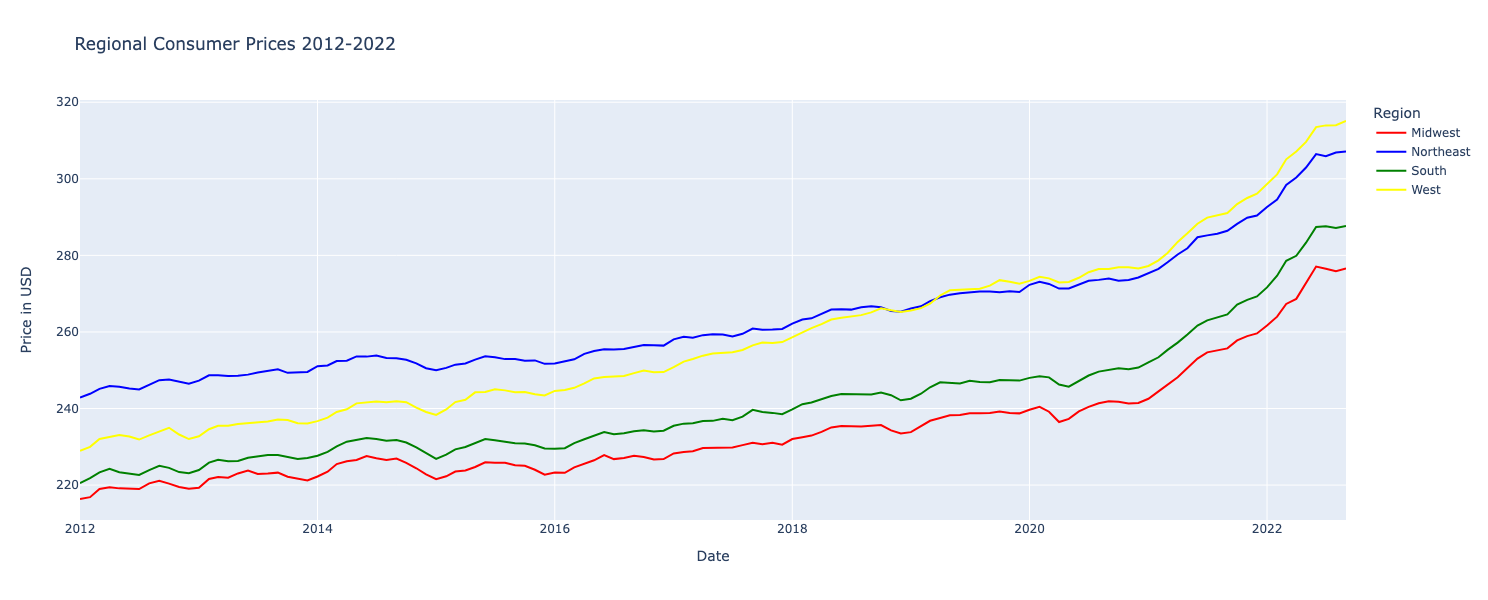

In [209]:
px.line(all_regions_df, 
        labels={'value': 'Price in USD', 'variable': 'Region'}, 
        title="Regional Consumer Prices 2012-2022", color_discrete_sequence=['red','blue','green','yellow'], width=1300, height=600)

In [75]:
all_df = all_df.rename(columns = {'Price':'National'})

In [76]:
combined_df = pd.concat([all_df, midwest_df, northeast_df, south_df, west_df], axis=1, join='inner')
combined_df.head()

,National,Midwest,Northeast,South,West
Date,,,,,
2012-01-01,226.665,216.368,242.879,220.497,228.980
2012-02-01,227.663,216.855,243.850,221.802,229.995
2012-03-01,229.392,218.975,245.125,223.314,232.039
2012-04-01,230.085,219.405,245.850,224.275,232.561
2012-05-01,229.815,219.145,245.709,223.356,233.053


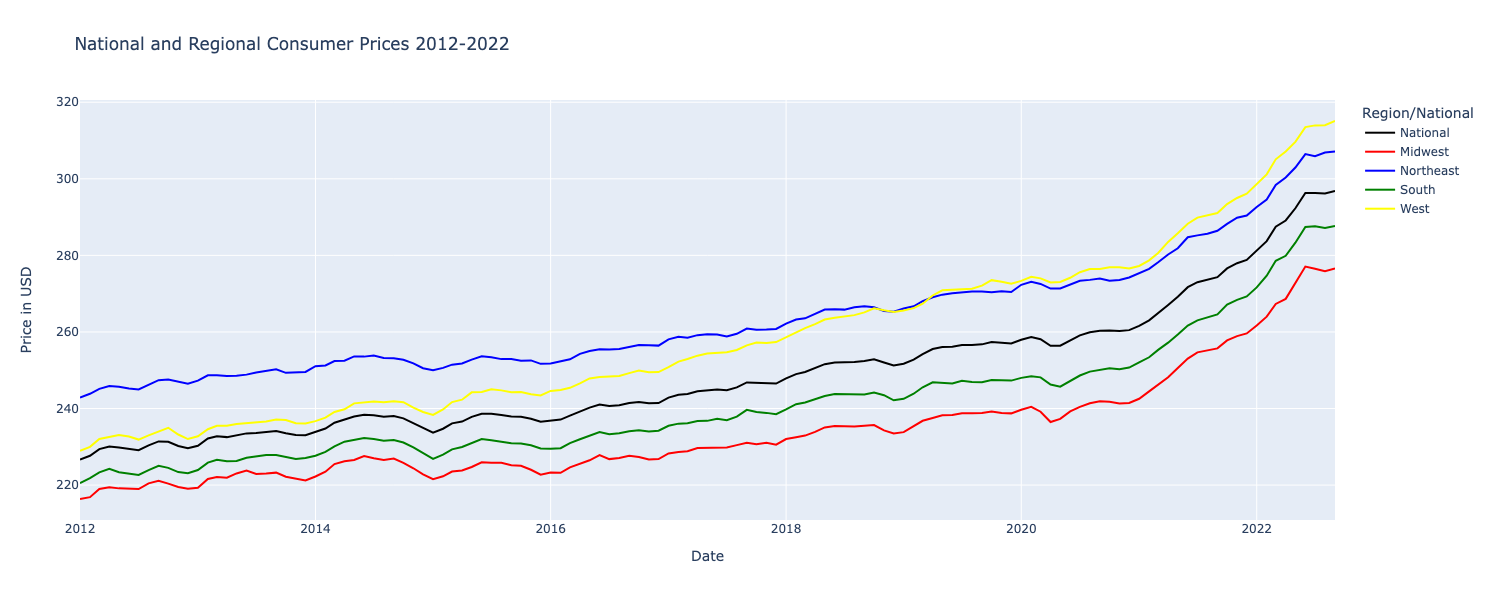

In [210]:
px.line(combined_df, 
        labels={'value': 'Price in USD', 'variable': 'Region/National'}, 
        title="National and Regional Consumer Prices 2012-2022", color_discrete_sequence=['black','red','blue','green','yellow'],
       width=1300, height=600)

In [79]:
combined_corr = combined_df.corr()
combined_corr

,National,Midwest,Northeast,South,West
National,1.000000,0.994282,0.999581,0.998443,0.994116
Midwest,0.994282,1.000000,0.993716,0.997840,0.977289
Northeast,0.999581,0.993716,1.000000,0.997695,0.993692
South,0.998443,0.997840,0.997695,1.000000,0.986850
West,0.994116,0.977289,0.993692,0.986850,1.000000


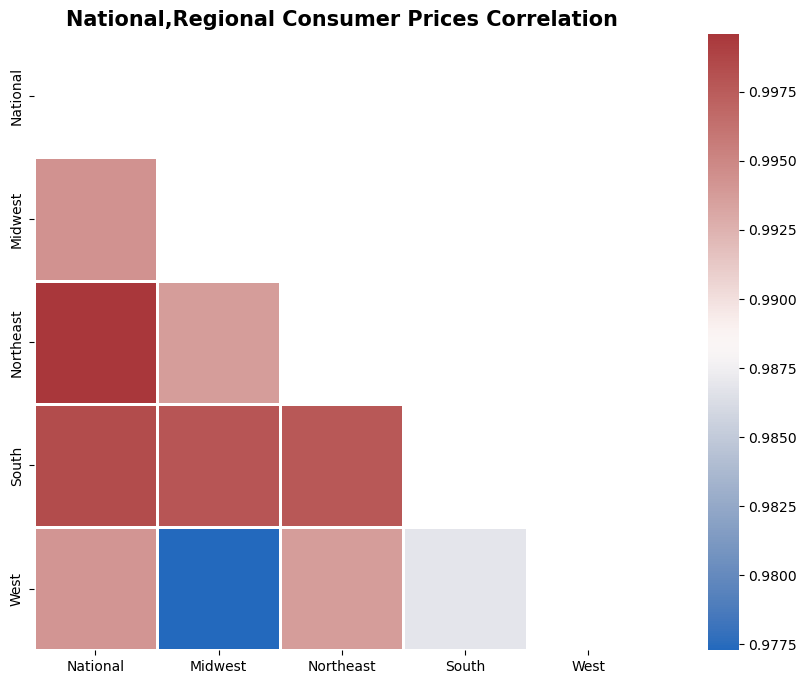

In [285]:
plt.figure(figsize=(15,8),)
plt.title("National,Regional Consumer Prices Correlation", fontsize=15, fontweight='bold')
sns.heatmap(combined_corr,
            square=True,
            linewidth=1,cmap='vlag',
            mask=np.triu(np.ones_like(combined_corr, dtype=bool)));

In [80]:
# Need make Map visualization 

In [81]:
#find percent change in each reagion per month
all_regions_pct = all_regions_df.pct_change().dropna()
all_regions_pct.tail()

,Midwest,Northeast,South,West
Date,,,,
2022-05-01,0.015016,0.008704,0.012248,0.008139
2022-06-01,0.016133,0.011600,0.014543,0.012437
2022-07-01,-0.001974,-0.001752,0.000630,0.001451
2022-08-01,-0.002351,0.003069,-0.001530,0.000197
2022-09-01,0.002443,0.000968,0.001699,0.003443


In [82]:
# crate seperate dataframes for dates before and after January 2020
all_regions_pct_b20 = all_regions_pct[:95]
all_regions_pct_a20 = all_regions_pct[95:]

display(all_regions_pct_b20.head())
display(all_regions_pct_a20.head())

,Midwest,Northeast,South,West
Date,,,,
2012-02-01,0.002251,0.003998,0.005918,0.004433
2012-03-01,0.009776,0.005229,0.006817,0.008887
2012-04-01,0.001964,0.002958,0.004303,0.002250
2012-05-01,-0.001185,-0.000574,-0.004098,0.002116
2012-06-01,-0.000584,-0.002067,-0.001576,-0.001510


,Midwest,Northeast,South,West
Date,,,,
2020-01-01,0.004004,0.006978,0.002895,0.002773
2020-02-01,0.003050,0.002806,0.001641,0.003922
2020-03-01,-0.005232,-0.002010,-0.001111,-0.001520
2020-04-01,-0.011243,-0.004425,-0.007585,-0.003949
2020-05-01,0.003455,0.000074,-0.002266,0.000546


In [129]:
all_regions_pct_b20.head(12)

,Midwest,Northeast,South,West
Date,,,,
2012-02-01,0.002251,0.003998,0.005918,0.004433
2012-03-01,0.009776,0.005229,0.006817,0.008887
2012-04-01,0.001964,0.002958,0.004303,0.002250
2012-05-01,-0.001185,-0.000574,-0.004098,0.002116
2012-06-01,-0.000584,-0.002067,-0.001576,-0.001510
2012-07-01,-0.000279,-0.000885,-0.001511,-0.003472
2012-08-01,0.006878,0.005176,0.005623,0.004778
2012-09-01,0.003007,0.004698,0.005060,0.004644
2012-10-01,-0.003392,0.000626,-0.002435,0.003772


In [84]:
all_regions_pct_b20_avg = all_regions_pct_b20.mean()
all_regions_pct_a20_avg = all_regions_pct_a20.mean()

display(all_regions_pct_b20_avg)
display(all_regions_pct_a20_avg)

Midwest      0.001043
Northeast    0.001135
South        0.001213
West         0.001842
dtype: float64

Midwest      0.004481
Northeast    0.003874
South        0.004604
West         0.004409
dtype: float64

### Visualizations

In [150]:
regions_df = pd.DataFrame({
    'Region':['Midwest','Northeast','South','West'],
    'Latitude':[41.881832,40.730610,33.753746,40.759926],
    'Longitude':[-87.623177,-73.935242,-84.386330,-111.884888],
})

In [85]:
all_regions_mapped_df = pd.concat([regions_df[['Region','Latitude','Longitude']]]*129, ignore_index=True).sort_values('Region').reset_index().drop(columns='index')

dates = pd.DataFrame([int(date[:10].replace('-','')) for date in all_regions_df.index.values.astype(str)])

all_regions_mapped_df['Date'] = pd.concat([dates,dates,dates,dates]).reset_index().drop(columns='index')
all_regions_mapped_df['Price'] = pd.concat([all_regions_df[i] for i in all_regions_df.columns]).reset_index()[0]


all_regions_mapped_df = all_regions_mapped_df[['Date','Price', 'Region', 'Latitude', 'Longitude']]

all_regions_mapped_df

,Date,Price,Region,Latitude,Longitude
0,20120101,216.368,Midwest,41.881832,-87.623177
1,20120201,216.855,Midwest,41.881832,-87.623177
2,20120301,218.975,Midwest,41.881832,-87.623177
3,20120401,219.405,Midwest,41.881832,-87.623177
4,20120501,219.145,Midwest,41.881832,-87.623177
...,...,...,...,...,...
511,20220501,309.645,West,40.759926,-111.884888
512,20220601,313.496,West,40.759926,-111.884888
513,20220701,313.951,West,40.759926,-111.884888
514,20220801,314.013,West,40.759926,-111.884888


In [158]:
all_regions_pct_before_2020 = pd.concat([regions_df[['Region','Latitude','Longitude']]]*8, ignore_index=True).sort_values('Region').reset_index().drop(columns='index')

yearly_regional_means = []

for col in all_regions_pct_a20.columns:
    yearly_regional_means.append(all_regions_pct_b20.iloc[:11][col].mean())
    yearly_regional_means.append(all_regions_pct_b20.iloc[11:23][col].mean())
    yearly_regional_means.append(all_regions_pct_b20.iloc[23:35][col].mean())
    yearly_regional_means.append(all_regions_pct_b20.iloc[35:47][col].mean())
    yearly_regional_means.append(all_regions_pct_b20.iloc[47:59][col].mean())
    yearly_regional_means.append(all_regions_pct_b20.iloc[59:71][col].mean())
    yearly_regional_means.append(all_regions_pct_b20.iloc[71:83][col].mean())
    yearly_regional_means.append(all_regions_pct_b20.iloc[83:][col].mean())
    


all_regions_pct_before_2020['Year'] = list(range(2012,2020))*4
all_regions_pct_before_2020['Mean'] = yearly_regional_means
all_regions_pct_before_2020 = all_regions_pct_before_2020[['Year','Mean', 'Region', 'Latitude', 'Longitude']]
all_regions_pct_before_2020

,Year,Mean,Region,Latitude,Longitude
0,2012,0.001122,Midwest,41.881832,-87.623177
1,2013,0.000827,Midwest,41.881832,-87.623177
2,2014,0.000623,Midwest,41.881832,-87.623177
3,2015,-0.000029,Midwest,41.881832,-87.623177
4,2016,0.001516,Midwest,41.881832,-87.623177
5,2017,0.001372,Midwest,41.881832,-87.623177
6,2018,0.001051,Midwest,41.881832,-87.623177
7,2019,0.001867,Midwest,41.881832,-87.623177
8,2012,0.001334,Northeast,40.730610,-73.935242
9,2013,0.001048,Northeast,40.730610,-73.935242


In [147]:
all_regions_pct_after_2020 = pd.concat([regions_df[['Region','Latitude','Longitude']]]*3, ignore_index=True).sort_values('Region').reset_index().drop(columns='index')

yearly_regional_means = []

for col in all_regions_pct_a20.columns:
    yearly_regional_means.append(all_regions_pct_a20.iloc[:12][col].mean())
    yearly_regional_means.append(all_regions_pct_a20.iloc[12:24][col].mean())
    yearly_regional_means.append(all_regions_pct_a20.iloc[24:][col].mean())
    


all_regions_pct_after_2020['Year'] = list(range(2020,2023))*4
all_regions_pct_after_2020['Mean'] = yearly_regional_means
all_regions_pct_after_2020 = all_regions_pct_after_2020[['Year','Mean', 'Region', 'Latitude', 'Longitude']]
all_regions_pct_after_2020

,Midwest,Northeast,South,West
Date,,,,
2020-01-01,0.004004,0.006978,0.002895,0.002773
2020-02-01,0.003050,0.002806,0.001641,0.003922
2020-03-01,-0.005232,-0.002010,-0.001111,-0.001520
2020-04-01,-0.011243,-0.004425,-0.007585,-0.003949
2020-05-01,0.003455,0.000074,-0.002266,0.000546
2020-06-01,0.008294,0.003457,0.006215,0.004003
2020-07-01,0.004894,0.003908,0.005647,0.005260
2020-08-01,0.003876,0.000915,0.004103,0.003070
2020-09-01,0.002138,0.001199,0.002219,-0.000076


In [159]:
all_regions_mapped_df.hvplot.points(
    'Longitude',
    'Latitude',
    geo=True,
    size='Price',
    color='Price',
    cmap='nipy_spectral',
    scale=4,
    groupby='Date',
    ylabel='Latitude',
    xlabel='Longitude',
    clabel='Price',
    clim=(220,315),
    frame_width=1000,
    frame_height=500,
    tiles='OSM',
    title='Monthly Regional Consumer Prices 2012/01-2020/09'
)

:DynamicMap   [Date]
   :Overlay
      .Tiles.I  :Tiles   [x,y]
      .Points.I :Points   [Longitude,Latitude]   (Price)

In [168]:
all_regions_pct_before_2020.hvplot.points(
    'Longitude',
    'Latitude',
    geo=True,
    size='Mean',
    color='Mean',
    scale=1000,
    groupby='Year',
    ylabel='Latitude',
    xlabel='Longitude',
    cmap='nipy_spectral',
    clabel='Average Yearly Percent Change',
    frame_width=1000,
    frame_height=500,
    tiles='OSM',
    title='Average Yearly Regional Consumer Price Percentage Change 2012-2019')

:DynamicMap   [Year]
   :Overlay
      .Tiles.I  :Tiles   [x,y]
      .Points.I :Points   [Longitude,Latitude]   (Mean)

In [169]:
all_regions_pct_after_2020.hvplot.points(
    'Longitude',
    'Latitude',
    geo=True,
    size='Mean',
    color='Mean',
    scale=1000,
    groupby='Year',
    ylabel='Latitude',
    xlabel='Longitude',
    cmap='nipy_spectral',
    clabel='Average Yearly Percent Change',
    frame_width=1000,
    frame_height=500,
    tiles='OSM',
    title='Average Yearly Regional Consumer Price Percentage Change 2020-2022')

:DynamicMap   [Year]
   :Overlay
      .Tiles.I  :Tiles   [x,y]
      .Points.I :Points   [Longitude,Latitude]   (Mean)

## Explanation
@TODO Add Explanation Here: Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.